In [1]:
import pandas as pd
import numpy  as np
import sklearn as sk
import math as ma
import scipy.stats as st
import matplotlib
from matplotlib import pylab as plt
import textcleaner as tc 
import re
import nltk

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

from os.path import dirname, abspath
d = dirname(dirname(abspath("data1030-student-f19/Whiskey1030/")))

In [2]:
# load the data
df = pd.read_csv(dirname(d)+'/Data/whiskey_reviews.csv')

df.head()
#print(df.shape)

,ID,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [3]:
print(df.isnull().values.any()) #no missing values
print(df['currency'].value_counts()) # can drop currency

False
$    2247
Name: currency, dtype: int64


In [4]:
df.drop(columns=['ID','currency'],inplace=True)
df.head()

,name,category,review.point,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin..."


In [5]:
percent=[re.findall(r"([0-9]+\.?[0-9]*)%",i) for i in df.name]
percent

percentll = [i[0] for i in [i or [0] for i in percent]]

#flat_list = [item for sublist in percent for item in sublist]
#len(flat_list)
percentll

df['percent'] = percentll
df['percent'] = df['percent'].astype(float)
df.head()

,name,category,review.point,price,description,percent
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ...",40.0
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500,What impresses me most is how this whisky evol...,40.5
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500,There have been some legendary Bowmores from t...,42.9
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...,53.4
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin...",40.0


In [6]:
df[df.percent==0]
print(len(df[df.percent==0]))

16


In [12]:
df.loc[df.name == 'Ardbeg An Oa','percent' ] = 46.6
df.loc[df.name == 'Balvenie 1973 Vintage, 30 year old, Cask #9219','percent' ] = 47.3
df.loc[df.name == 'Bowmore Oloroso Sherry Cask, 1964 Vintage','percent' ] = 42.9
df.loc[df.name == 'Scott','percent'] = 45
df.loc[df.name == 'Compass Box Hedonism Maximus','percent'] = 46
df.loc[df.name == 'Cadenhead','percent'] = 46
df.loc[df.name == 'Glenfarclas £511. 19s. 0d.','percent'] = 60

df.loc[668,'percent'] = 46
df.loc[909, 'percent']= 55
df.loc[984, 'percent'] = 43


df.loc[df.name == 'Ardmore Traditional Cask 1998','percent'] = 44.9

df.loc[1002, 'percent'] = 46
df.loc[1504, 'percent']= 46
df.loc[1647, 'percent']= 57.1
df.loc[1956, 'percent']= 40
df.loc[2034, 'percent']=53.5


df[df.percent==0]

,name,category,review.point,price,description,percent


In [217]:
print(df['category'].value_counts(normalize=True))

Single Malt Scotch            0.809524
Blended Scotch Whisky         0.093903
Blended Malt Scotch Whisky    0.058745
Single Grain Whisky           0.025367
Grain Scotch Whisky           0.012461
Name: category, dtype: float64


In [14]:
df['price'].describe()

count     2247
unique     453
top        100
freq        85
Name: price, dtype: object

In [18]:
df['price'] = df['price'].replace(['$15,000 or $60,000/set'], '15000')
df['price'] = df['price'].replace(['60000/set'], '60000')
df['price'] = df['price'].replace(['44/liter'], '44')

df['price']=df['price'].apply(lambda x:x.replace(',',''))
df['price']=df['price'].apply(lambda x:x.replace('.',''))

df['description']=df['description'].apply(lambda x:x.replace(',',''))
df['description']=df['description'].apply(lambda x:x.replace(')',''))
df['description']=df['description'].apply(lambda x:x.replace('(',''))
df['description']=df['description'].apply(lambda x:x.replace('.',''))
df['description']=df['description'].apply(lambda x:x.replace('!',''))
df['description']=df['description'].apply(lambda x:x.replace(':',''))
df['description']=df['description'].apply(lambda x:x.replace(';',''))
df['description']=df['description'].apply(lambda x:x.replace('-',''))
df['description']=df['description'].apply(lambda x:x.replace('—',''))

df['name']=df['name'].apply(lambda x:x.replace(')',''))
df['name']=df['name'].apply(lambda x:x.replace('(',''))
df['name']=df['name'].apply(lambda x:x.replace('!',''))
df['name']=df['name'].apply(lambda x:x.replace(':',''))
df['name']=df['name'].apply(lambda x:x.replace(';',''))


In [19]:
df['price'] = df['price'].astype(float)
df['price'].describe()

count      2247.000000
mean        709.205607
std        5660.577607
min          12.000000
25%          70.000000
50%         110.000000
75%         200.000000
max      157000.000000
Name: price, dtype: float64

In [20]:
df['review.point'].describe()

count    2247.000000
mean       86.700045
std         4.054055
min        63.000000
25%        84.000000
50%        87.000000
75%        90.000000
max        97.000000
Name: review.point, dtype: float64

In [21]:
hotenc=OneHotEncoder(sparse=False)

df['category'].unique()

df_cat=hotenc.fit_transform(df[['category']])
hotenc.get_feature_names()

df_cat= pd.DataFrame(df_cat)
df_cat.columns = hotenc.get_feature_names()

df_cat.head()

,x0_Blended Malt Scotch Whisky,x0_Blended Scotch Whisky,x0_Grain Scotch Whisky,x0_Single Grain Whisky,x0_Single Malt Scotch
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [22]:
#create new dataset with preprocessing and hot encoding
dfpre=df.copy()
df.head()

,name,category,review.point,price,description,percent
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225.0,Magnificently powerful and intense Caramels dr...,40.0
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.0,What impresses me most is how this whisky evol...,40.5
2,"Bowmore 46 year old distilled 1964, 42.9%",Single Malt Scotch,97,13500.0,There have been some legendary Bowmores from t...,42.9
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325.0,With a name inspired by a 1926 Buster Keaton m...,53.4
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160.0,Captivating enticing and wonderfully charming ...,40.0


In [23]:
dfpre.drop(['category'],axis=1, inplace=True)
dfpre=pd.concat([dfpre,df_cat],axis=1)

In [24]:
dfpre.head()

,name,review.point,price,description,percent,x0_Blended Malt Scotch Whisky,x0_Blended Scotch Whisky,x0_Grain Scotch Whisky,x0_Single Grain Whisky,x0_Single Malt Scotch
0,"Johnnie Walker Blue Label, 40%",97,225.0,Magnificently powerful and intense Caramels dr...,40.0,0.0,1.0,0.0,0.0,0.0
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",97,4500.0,What impresses me most is how this whisky evol...,40.5,0.0,0.0,0.0,0.0,1.0
2,"Bowmore 46 year old distilled 1964, 42.9%",97,13500.0,There have been some legendary Bowmores from t...,42.9,0.0,0.0,0.0,0.0,1.0
3,"Compass Box The General, 53.4%",96,325.0,With a name inspired by a 1926 Buster Keaton m...,53.4,1.0,0.0,0.0,0.0,0.0
4,"Chivas Regal Ultis, 40%",96,160.0,Captivating enticing and wonderfully charming ...,40.0,1.0,0.0,0.0,0.0,0.0


In [25]:
sscaler = StandardScaler()
mmscaler = MinMaxScaler()

In [26]:
dfpre[['review.point']]=mmscaler.fit_transform(dfpre[['review.point']])
dfpre[['percent']]=sscaler.fit_transform(dfpre[['percent']])
dfpre[['price']]=sscaler.fit_transform(dfpre[['price']])

In [108]:
# make sure all words are lowercase
dfpre['description']=dfpre['description'].str.lower()
dfpre['name']=dfpre['name'].str.lower()

dfpre.to_csv(dirname(d)+'/Data/dfpre.csv', encoding='utf-8', index=False)
dfpre.head()

,name,review.point,price,description,percent,x0_Blended Malt Scotch Whisky,x0_Blended Scotch Whisky,x0_Grain Scotch Whisky,x0_Single Grain Whisky,x0_Single Malt Scotch
0,"johnnie walker blue label, 40%",1.000000,-0.085559,magnificently powerful and intense caramels dr...,-1.276825,0.0,1.0,0.0,0.0,0.0
1,"black bowmore, 1964 vintage, 42 year old, 40.5%",1.000000,0.669832,what impresses me most is how this whisky evol...,-1.196793,0.0,0.0,0.0,0.0,1.0
2,"bowmore 46 year old distilled 1964, 42.9%",1.000000,2.260130,there have been some legendary bowmores from t...,-0.812641,0.0,0.0,0.0,0.0,1.0
3,"compass box the general, 53.4%",0.970588,-0.067889,with a name inspired by a 1926 buster keaton m...,0.868027,1.0,0.0,0.0,0.0,0.0
4,"chivas regal ultis, 40%",0.970588,-0.097044,captivating enticing and wonderfully charming ...,-1.276825,1.0,0.0,0.0,0.0,0.0


In [95]:
blended_malt_scotch=dfpre.loc[dfpre["x0_Blended Malt Scotch Whisky"] == 1, ['description']]
blended_scotch=dfpre.loc[dfpre["x0_Blended Scotch Whisky"] == 1, ['description']]
grain_scotch_=dfpre.loc[dfpre["x0_Grain Scotch Whisky"] == 1, ['description']]
single_grain_whisky=dfpre.loc[dfpre["x0_Single Grain Whisky"] == 1, ['description']]
single_malt_scotch=dfpre.loc[dfpre["x0_Single Malt Scotch"] == 1, ['description']]


In [158]:
# convert dataframe column to a list
descriptions=df["description"].tolist()
names=df["name"].tolist()

# lematize words, remove stopwords and numbers
#dclean=tc.document(descriptions).remove_stpwrds()
#dclean=tc.document(dclean).lemming()
#dclean=tc.document(dclean).remove_numbers()
blended_scotch.head()

,description
0,magnificently powerful and intense caramels dr...
14,as you’d expect solid peat is the first thing ...
15,formulated to celebrate the 200th anniversary ...
16,an essay in balance on both the aroma and pala...
35,a 12 year old blended whisky was created in 19...


In [124]:
# BLENDED MALT SCOTCH
cat1=blended_malt_scotch["description"].tolist()
cat1=tc.document(cat1).remove_stpwrds()
cat1=tc.document(cat1).lemming()
cat1=tc.document(cat1).remove_numbers()

In [ ]:
#BLENDED SCOTCH
cat2=blended_scotch["description"].tolist()
cat2=tc.document(cat2).remove_stpwrds()
cat2=tc.document(cat2).lemming()
cat2=tc.document(cat2).remove_numbers()

In [190]:
#GRAIN SCOTCH
cat3=grain_scotch_["description"].tolist()
cat3=tc.document(cat3).remove_stpwrds()
cat3=tc.document(cat3).lemming()
cat3=tc.document(cat3).remove_numbers()

In [192]:
#single_grain_whisky
cat4=single_grain_whisky["description"].tolist()
cat4=tc.document(cat4).remove_stpwrds()
cat4=tc.document(cat4).lemming()
cat4=tc.document(cat4).remove_numbers()

In [193]:
#single_malt_scotch
cat5=single_malt_scotch["description"].tolist()
cat5=tc.document(cat5).remove_stpwrds()
cat5=tc.document(cat5).lemming()
cat5=tc.document(cat5).remove_numbers()

In [139]:
# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [196]:
# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)

# convert the documents into a document-term matrix
wm = cvec.fit_transform(cat5)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
cat5=wm2df(wm, tokens)

cat5.to_csv(dirname(d)+'/Data/cat5.csv', encoding='utf-8', index=False)

In [200]:
# load the data
#ddclean = pd.read_csv(dirname(d)+'/Data/ddclean.csv')
cat3.head()
#2247 rows × 8646 columns

,abound,according,acetone,active,actually,add,additional,adhesive,adrift,age,...,worth,would,ximénez,xop,year,you,young,youngster,zest,zinging
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [174]:
word_freq=ddclean.sum(axis = 0, skipna = True)
type(word_freq)

o_word = pd.DataFrame([word_freq])
o_word=o_word.transpose()
o_word = o_word.sort_values(0,ascending=False)
o_word.head()

,0
finish,1467
fruit,1286
note,1282
whisky,1263
palate,1214


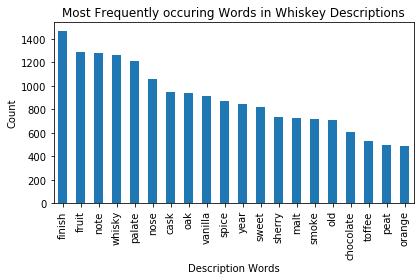

In [175]:
#word_freq.value_counts()[:20].plot(kind='bar')
o_word[0][:20].plot.bar()
plt.xlabel('Description Words')
plt.ylabel('Count')
plt.title('Most Frequently occuring Words in Whiskey Descriptions')
plt.tight_layout()

plt.savefig(dirname(d)+'/Figures/word_freq.png',dpi=300)
plt.show()

In [176]:
#Blended Malt Scotch Whisky
c1word_freq=cat1.sum(axis = 0, skipna = True)
c1_word = pd.DataFrame([c1word_freq])
c1_word=c1_word.transpose()
c1_word = c1_word.sort_values(0,ascending=False)
c1_word.head()

,0
whisky,106
malt,81
finish,64
smoke,63
fruit,63


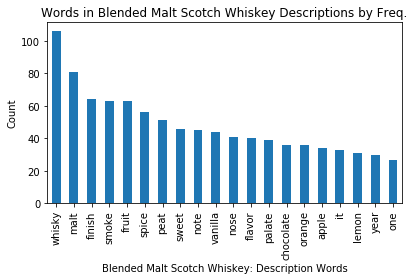

In [177]:
#word_freq.value_counts()[:20].plot(kind='bar')
c1_word[0][:20].plot.bar()
plt.xlabel('Blended Malt Scotch Whiskey: Description Words')
plt.ylabel('Count')
plt.title('Words in Blended Malt Scotch Whiskey Descriptions by Freq.')
plt.tight_layout()

plt.savefig(dirname(d)+'/Figures/c1word_freq.png',dpi=300)
plt.show()

In [183]:
c2word_freq=cat2.sum(axis = 0, skipna = True)
c2_word = pd.DataFrame([c2word_freq])
c2_word=c2_word.transpose()
c2_word = c2_word.sort_values(0,ascending=False)
c2_word.head()

,0
spice,152
finish,132
whisky,128
blend,113
fruit,101


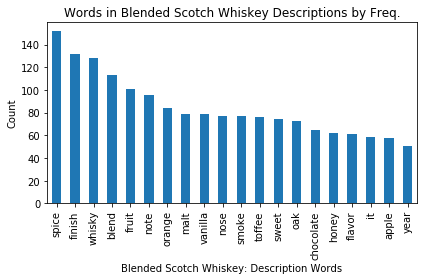

In [204]:
#word_freq.value_counts()[:20].plot(kind='bar')
c2_word[0][:20].plot.bar()
plt.xlabel('Blended Scotch Whiskey: Description Words')
plt.ylabel('Count')
plt.title('Words in Blended Scotch Whiskey Descriptions by Freq.')
plt.tight_layout()

plt.savefig(dirname(d)+'/Figures/c2word_freq.png',dpi=300)
plt.show()

In [206]:
c3word_freq=cat3.sum(axis = 0, skipna = True)
c3_word = pd.DataFrame([c3word_freq])
c3_word=c3_word.transpose()
c3_word = c3_word.sort_values(0,ascending=False)
c3_word.head()

,0
whisky,34
grain,30
note,24
finish,20
vanilla,19


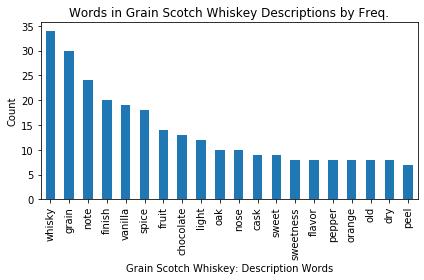

In [210]:
#word_freq.value_counts()[:20].plot(kind='bar')
c3_word[0][:20].plot.bar()
plt.xlabel('Grain Scotch Whiskey: Description Words')
plt.ylabel('Count')
plt.title('Words in Grain Scotch Whiskey Descriptions by Freq.')
plt.tight_layout()

plt.savefig(dirname(d)+'/Figures/c3word_freq.png',dpi=300)
plt.show()

In [211]:
c4word_freq=cat4.sum(axis = 0, skipna = True)
c4_word = pd.DataFrame([c4word_freq])
c4_word=c4_word.transpose()
c4_word = c4_word.sort_values(0,ascending=False)
c4_word.head()

,0
finish,45
grain,37
bottle,36
vanilla,36
spice,33


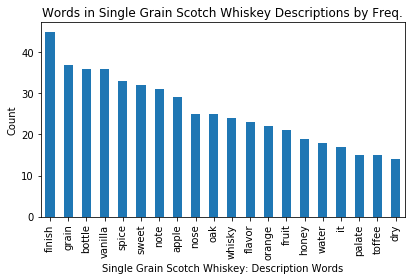

In [215]:
#word_freq.value_counts()[:20].plot(kind='bar')
c4_word[0][:20].plot.bar()
plt.xlabel('Single Grain Scotch Whiskey: Description Words')
plt.ylabel('Count')
plt.title('Words in Single Grain Scotch Whiskey Descriptions by Freq.')
plt.tight_layout()

plt.savefig(dirname(d)+'/Figures/c4word_freq.png',dpi=300)
plt.show()

In [213]:
c5word_freq=cat5.sum(axis = 0, skipna = True)
c5_word = pd.DataFrame([c5word_freq])
c5_word=c5_word.transpose()
c5_word = c5_word.sort_values(0,ascending=False)
c5_word.head()

,0
finish,1206
palate,1113
fruit,1087
note,1086
whisky,971


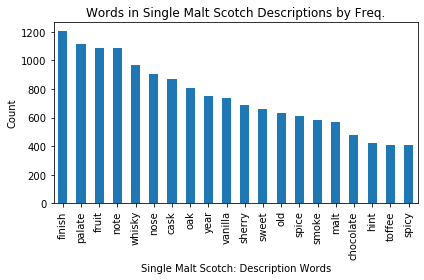

In [216]:
#word_freq.value_counts()[:20].plot(kind='bar')
c5_word[0][:20].plot.bar()
plt.xlabel('Single Malt Scotch: Description Words')
plt.ylabel('Count')
plt.title('Words in Single Malt Scotch Descriptions by Freq.')
plt.tight_layout()

plt.savefig(dirname(d)+'/Figures/c5word_freq.png',dpi=300)
plt.show()

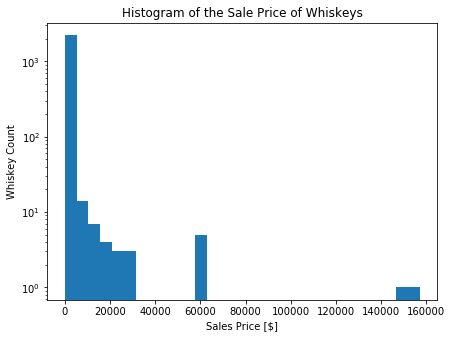

In [77]:
# Check histogram for Price
# define your canvas, e.g., figure size, number of subplots and their positions, etc
plt.figure(figsize=(6.4,4.8))

# draw on the figure, define the properties of the line or marker
#plt.hist(y,bins=30,log=True)
df['price'].hist(bins=30,log=True,grid=False)

# modify the properties of the figure
# axis labels, title, x and y limits, etc.
plt.xlabel('Sales Price [$]')
plt.ylabel('Whiskey Count')
plt.title('Histogram of the Sale Price of Whiskeys')
plt.tight_layout()

# show the figure in the notebook or save it as a file
plt.savefig(dirname(d)+'/Figures/price_hist.png',dpi=300)
plt.show()

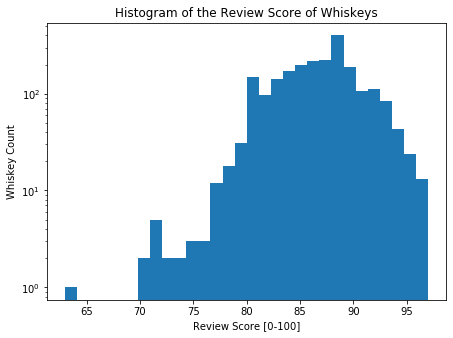

In [78]:
# Check histogram for Review Score
# define your canvas, e.g., figure size, number of subplots and their positions, etc
plt.figure(figsize=(6.4,4.8))

# draw on the figure, define the properties of the line or marker
df['review.point'].hist(bins=30,log=True,grid=False)

# modify the properties of the figure
# axis labels, title, x and y limits, etc.
plt.xlabel('Review Score [0-100]')
plt.ylabel('Whiskey Count')
plt.title('Histogram of the Review Score of Whiskeys')
plt.tight_layout()

# show the figure in the notebook or save it as a file
plt.savefig(dirname(d)+'/Figures/review_hist.png',dpi=300)
plt.show()

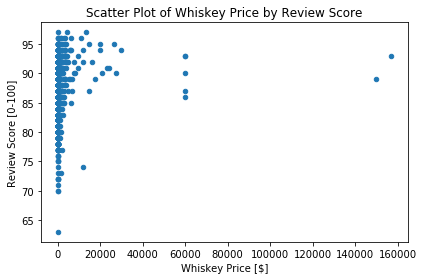

In [130]:
df.plot.scatter('price','review.point') # the color and size of each point can also be defined

plt.xlabel('Whiskey Price [$]')
plt.ylabel('Review Score [0-100]')
plt.title('Scatter Plot of Whiskey Price by Review Score')
#plt.tight_layout()
plt.tight_layout()
plt.savefig(dirname(d)+'/Figures/scatter_review_price.png',dpi=300)
plt.show()


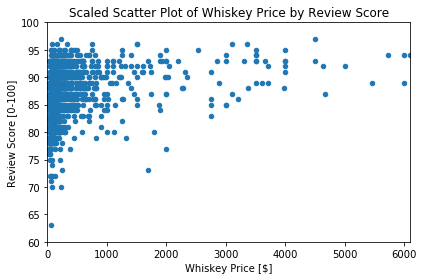

In [80]:
df.plot.scatter('price','review.point') # the color and size of each point can also be defined

plt.xlabel('Whiskey Price [$]')
plt.ylabel('Review Score [0-100]')
plt.title('Scaled Scatter Plot of Whiskey Price by Review Score')

plt.xlim(0,6100)
plt.ylim(60,100)
#plt.tight_layout()
plt.tight_layout()
plt.savefig(dirname(d)+'/Figures/scaled_scatter_review_price.png',dpi=900)
plt.show()

<Figure size 748.8x489.6 with 0 Axes>

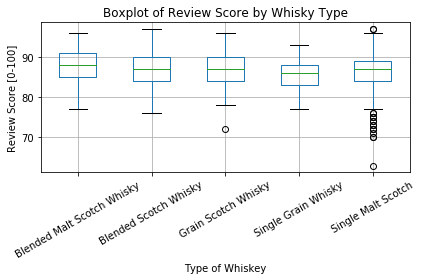

In [188]:
plt.figure(figsize=(10.4,6.8))
df[['review.point','category']].boxplot(by='category')

plt.suptitle('')
plt.title('Boxplot of Review Score by Whisky Type')
plt.ylabel('Review Score [0-100]')
plt.xlabel('Type of Whiskey')
plt.xticks(rotation= 30)
plt.tight_layout()
plt.savefig(dirname(d)+'/Figures/score_type_boxplot.png',dpi=900)
plt.show()

<Figure size 748.8x489.6 with 0 Axes>

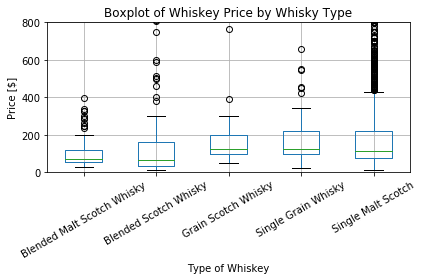

In [189]:
plt.figure(figsize=(10.4,6.8))
df[['price','category']].boxplot(by='category')
plt.suptitle('')
plt.title('Boxplot of Whiskey Price by Whisky Type')
plt.ylabel('Price [$]')
plt.xlabel('Type of Whiskey')
plt.ylim(0,800)
plt.xticks(rotation= 30)
plt.tight_layout()
plt.savefig(dirname(d)+'/Figures/price_type_boxplot.png',dpi=900)
plt.show()

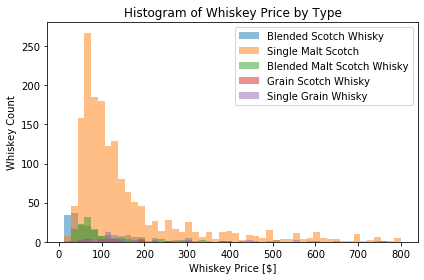

In [83]:
categories = df['category'].unique()
bin_range = (df['price'].min(),800)

for c in categories:
    plt.hist(df[df['category']==c]['price'],alpha=0.5,label=c,range=bin_range,bins=50)
plt.legend()
plt.ylabel('Whiskey Count')
plt.xlabel('Whiskey Price [$]')
plt.title('Histogram of Whiskey Price by Type')
plt.tight_layout()
plt.savefig(dirname(d)+'/Figures/cunm_hist.png',dpi=900)
plt.show()



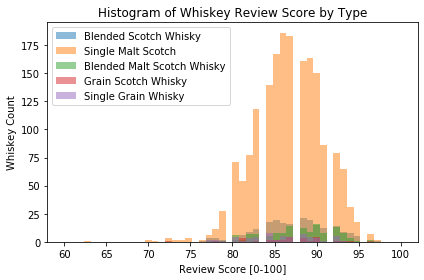

In [84]:
categories = df['category'].unique()
bin_range = (60,100)

for c in categories:
    plt.hist(df[df['category']==c]['review.point'],alpha=0.5,label=c,range=bin_range,bins=50)
plt.legend()
plt.ylabel('Whiskey Count')
plt.xlabel('Review Score [0-100]')
plt.title('Histogram of Whiskey Review Score by Type')
plt.tight_layout()
plt.savefig(dirname(d)+'/Figures/cum_rev_hist.png',dpi=900)
plt.show()


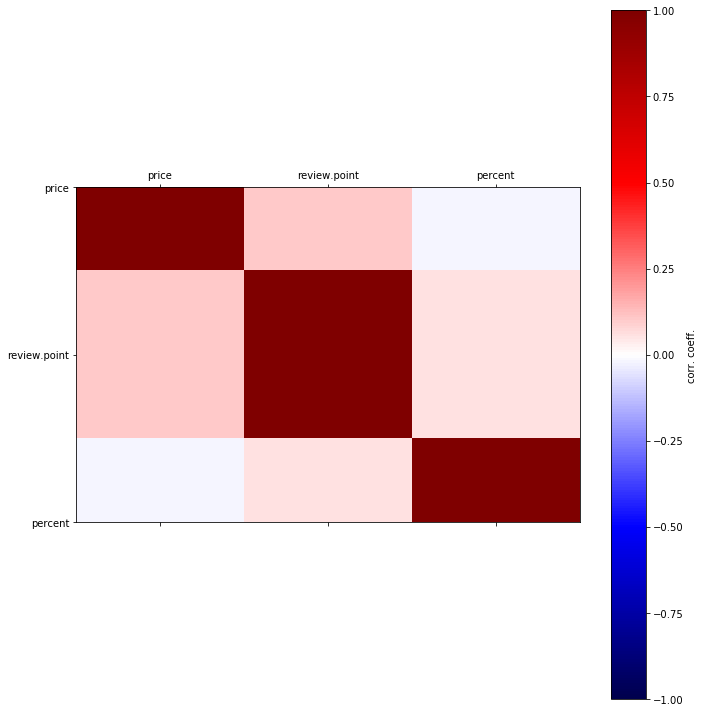

In [85]:
corrmat = df.corr()

all_cols = corrmat.sort_values('price',ascending=False)['price'].index 
cols = all_cols[:10] # positively correlated features

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols))
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.savefig(dirname(d)+'/Figures/correlation.png',dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
#try to find words that are tfd and idf afor each specific whiskey type
# interesting ratio for NLP
#percentage of word type by whiskey dividied by other whiskey and do it
#cluster by whiskey type
# sentiment analysis
# doing correlations and TDF and IDF

# make itb for list 
# make pandas series (filter)
#write a function that loops through all the names - 4 digit number if probably the year
#year old 2 digit number
#take the number right before the percent sign
# lookup function in python
# pattern matching python
# scatter plot review score an

## WATCH LABELS ON PLOTS IN BACK OF THE ROOM
# MAKE SURE TO HAVE GITHUB LINK ON SLIDE TITLE
# TIMING IS SUPER IMPORTANT
##